In [3]:
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder

%matplotlib inline

Duplicate key in file PosixPath('/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 768 ('font.family  : sans-serif')
Duplicate key in file PosixPath('/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 769 ('font.sans-serif : SimHei, DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file PosixPath('/opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'), line 770 ('axes.unicode_minus : False')


In [4]:
!ls ./titanic

gender_submission.csv  test.csv  train.csv


In [5]:
train = pd.read_csv("./titanic/train.csv")
test = pd.read_csv("./titanic/test.csv")
submission = pd.read_csv("./titanic/gender_submission.csv")

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.shape

(891, 12)

In [8]:
 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test.shape

(418, 11)

In [10]:
submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [11]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [12]:
train.dtypes.value_counts()


int64      5
object     5
float64    2
dtype: int64

In [13]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

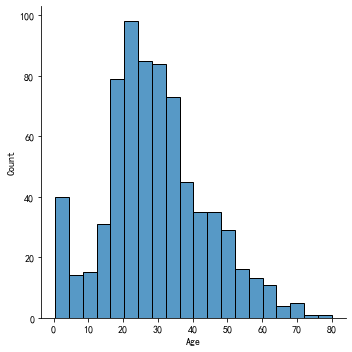

In [14]:
 sns.displot(train.Age)

<AxesSubplot:xlabel='Age'>

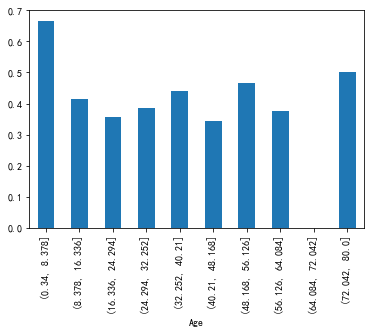

In [15]:
 train.groupby(pd.cut(train.Age, bins=10))["Survived"].mean().sort_index().plot(kind="bar")

In [16]:
 
train.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [17]:
train.groupby("Embarked")["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [18]:
train.groupby("Embarked")["Fare"].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

<AxesSubplot:xlabel='SibSp'>

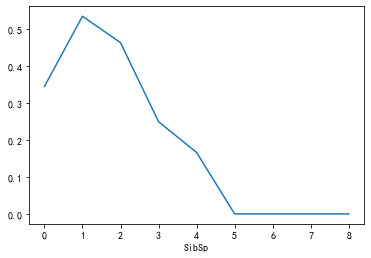

In [19]:
 
train.groupby("SibSp")["Survived"].mean().plot()

<AxesSubplot:xlabel='Parch'>

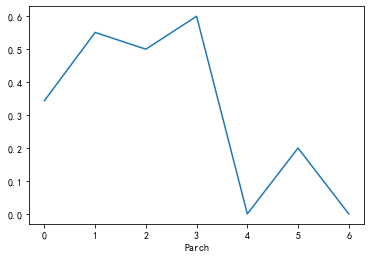

In [20]:
train.groupby("Parch")["Survived"].mean().plot()

<AxesSubplot:xlabel='Cabin'>

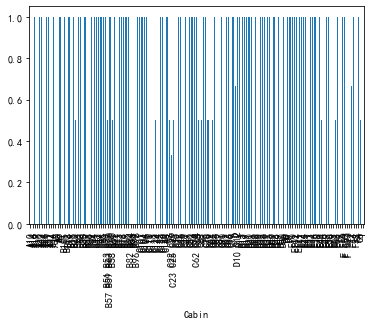

In [21]:
 
train.groupby("Cabin")["Survived"].mean().plot(kind="bar")

In [22]:
train["Cabin"].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
F2             3
              ..
F38            1
C111           1
A26            1
A10            1
B86            1
Name: Cabin, Length: 147, dtype: int64

In [38]:
def extract_name(x):
    x = x.split("(")[0] #取括号前的文本
    name1, name2 = x.split(",") #取name1
    name2, name3 = name2.split(".")#取name2，剩余为name3
    return [name1.strip().lower(), name2.strip().lower(), name3.strip().lower()]

In [39]:
train_names = train.Name.apply(extract_name) 
test_names = test.Name.apply(extract_name)

In [40]:
train["name1"] = [n[0] for n in train_names] 
train["name2"] = [n[1] for n in train_names] 
train["name3"] = [n[2] for n in train_names]

test["name1"] = [n[0] for n in test_names] 
test["name2"] = [n[1] for n in test_names] 
test["name3"] = [n[2] for n in test_names]

In [41]:
train.name1.value_counts()
train.name2.value_counts()
train.name3.value_counts()

                     16
william              11
john                 10
james                 9
mary                  6
                     ..
klas albin            1
augusta charlotta     1
gustaf joel           1
ahmed                 1
jeannie               1
Name: name3, Length: 714, dtype: int64

In [ ]:
drop_name2 = train.name2.value_counts().to_frame().query("name2<5").index.tolist()#找到重复个数低于5个的name2并形成列表
##注意这里query的用法，对frame可用，引号内输入条件
train.loc[train.name2.isin(drop_name2),'name2'] = "other" 
train.loc[train.name2 == 'other', "name2"] #在name2里个数低于5个的name都变成了other
test.loc[test.name2.isin(drop_name2), "name2"] = "other"#测试集同理

In [ ]:
 
train.groupby("name2")["Survived"].agg(["mean", "count"])

In [ ]:
train.drop(["Name", "name1", "name3"], axis=1, inplace=True) 
test.drop(["Name", "name1", "name3"], axis=1, inplace=True)

In [ ]:
def extract_ticket(x): 
    x = x.split(" ") 
    if len(x) > 1:
        prefix = x[0]
        ticket = " ".join(x[1:]) #把join内的多个元素用.前的字符串隔开组成新的字符串
    else:
        prefix = "NULL" 
        ticket = x
    return prefix.replace(".", "").lower()#特征截取只保留字符串部分，可能是某种有意义的分类

In [ ]:
train_ticket = train.Ticket.apply(extract_ticket)
test_ticket = test.Ticket.apply(extract_ticket)

In [ ]:
train["Ticket"] = train_ticket 
test["Ticket"] = test_ticket

In [ ]:
train.Ticket.value_counts()

In [ ]:
 
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
num_train = len(train)
train_target = train["Survived"].values



In [ ]:
#删除没有信息量的特征和训练集的目标值
train.drop(["PassengerId", "Survived"], axis=1, inplace=True) 
test.drop(["PassengerId"], axis=1, inplace=True)

In [ ]:
data = pd.concat([train, test], axis=0)

In [ ]:
 sns.displot(data.Age, bins=30)

In [ ]:
#把连续性变量分框转化为分类型变量
data["Age"] = pd.cut(data.Age, bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 100], 
                     labels=[f"age_{i}" for i in range(1, 12)]).astype(str)
#年龄的空值还是空值，但是变成了nan 

In [ ]:
data.isnull().sum() #为什么年龄空值为0，因为转化成了str

In [ ]:
data["Fare"] = data.Fare.fillna(data.Fare.median()) 
data["Embarked"] = data.Embarked.fillna("S")

In [ ]:
 
data["Cabin"].unique()

In [ ]:
#特征简化提高信息密度：对cabin这类枚举值爆炸但是信息密度低的特征只保留字母
data["Cabin"]=data["Cabin"].apply(lambda x:x[0] if isinstance(x, str) else "null")#isinstance(x, str) 判断x是否为字符串类型

In [ ]:
#log1p:
data["Fare"] = pd.cut(np.log1p(data.Fare), bins=[0, 2, 3, 4, 5, 8], labels=[f"fare_{i}" for i in range(1,6)])

In [ ]:
#将可能会有的枚举值收敛到3？有什么用呢？
data.loc[data.Parch >= 3, "Parch"] = 3

In [ ]:

data.Parch.value_counts()

In [ ]:
data = data.rename({"name2": "Name"}, axis=1)

In [ ]:
#如果不转换，下面的onehot编码会报错
data["Fare"] = data.Fare.astype("str")

In [ ]:
one_hot = OneHotEncoder(drop="first").fit(data)

In [ ]:
 
data_onehot = one_hot.transform(data)


In [ ]:
one_hot.categories_#看所有的特征枚举值（前面已经把所有数值类特征转化为分桶的离散特征）

In [ ]:
train = data_onehot[:num_train, :] 
test = data_onehot[num_train:, :]

In [ ]:
model = LogisticRegression() 
model.fit(train, train_target)

In [ ]:
 
model.predict(test)

In [ ]:

submission["Survived"] = model.predict(test)

In [ ]:
submission.to_csv("./submission.csv", index=False)